In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Univariate Analysis

In [5]:
df_main = pd.read_csv('working_datasets/merged_data.csv')

In [6]:
df_main

,date,state,district,pincode,bio_age_5_17,bio_age_17_,demo_age_5_17,demo_age_17_,age_0_5,age_5_17,age_18_greater
0,01-04-2025,Gujarat,Surat,395006,1347,1519,371,4784,473,137,26
1,01-04-2025,Uttar_Pradesh,Gautam_Buddha_Nagar,203207,1159,910,340,2370,242,241,29
2,01-04-2025,Rajasthan,Jaipur,302020,317,627,152,1479,164,75,12
3,01-04-2025,Karnataka,Bengaluru,560067,193,128,138,766,158,26,39
4,01-04-2025,Madhya_Pradesh,Satna,485001,1557,1066,279,1818,368,55,14
...,...,...,...,...,...,...,...,...,...,...,...
762079,31-10-2025,Telangana,K.V._Rangareddy,500090,11,5,5,6,1,0,0
762080,31-10-2025,Telangana,K.V._Rangareddy,500089,17,8,14,39,4,3,0
762081,31-10-2025,Telangana,K.V._Rangareddy,500047,42,4,13,48,3,2,0
762082,31-10-2025,Telangana,Jogulamba_Gadwal,509152,3,8,3,16,1,0,0


In [7]:
df_main.describe()

,pincode,bio_age_5_17,bio_age_17_,demo_age_5_17,demo_age_17_,age_0_5,age_5_17,age_18_greater
count,762084.000000,762084.000000,762084.000000,762084.000000,762084.000000,762084.000000,762084.000000,762084.000000
mean,516827.035118,12.548703,11.858075,2.542199,23.123273,3.423863,1.482976,0.095633
std,207603.658704,49.176204,50.543161,12.782507,101.359695,16.184459,9.172584,1.162400
min,110001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,360575.000000,2.000000,2.000000,0.000000,5.000000,1.000000,0.000000,0.000000
50%,515671.000000,6.000000,6.000000,1.000000,11.000000,2.000000,0.000000,0.000000
75%,700145.000000,13.000000,13.000000,3.000000,24.000000,4.000000,1.000000,0.000000
max,855117.000000,5854.000000,7201.000000,1883.000000,14732.000000,2688.000000,1376.000000,199.000000


In [8]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762084 entries, 0 to 762083
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            762084 non-null  object
 1   state           762084 non-null  object
 2   district        762084 non-null  object
 3   pincode         762084 non-null  int64 
 4   bio_age_5_17    762084 non-null  int64 
 5   bio_age_17_     762084 non-null  int64 
 6   demo_age_5_17   762084 non-null  int64 
 7   demo_age_17_    762084 non-null  int64 
 8   age_0_5         762084 non-null  int64 
 9   age_5_17        762084 non-null  int64 
 10  age_18_greater  762084 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 64.0+ MB



Analyzing: state

Basic Statistics:
count            762084
unique               45
top       Uttar_Pradesh
freq              88369
Name: state, dtype: object


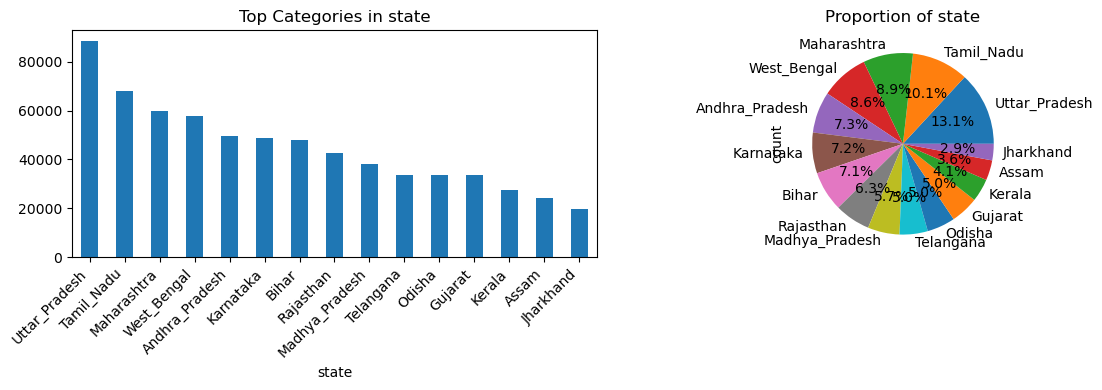


Key Insights:
- Total unique values: 45
- Most common: Uttar_Pradesh (88369 occurrences)
- Top 5:
state
Uttar_Pradesh     88369
Tamil_Nadu        68069
Maharashtra       59789
West_Bengal       57584
Andhra_Pradesh    49445
Name: count, dtype: int64

Analyzing: district

Basic Statistics:
count                762084
unique                  887
top       North_24_Parganas
freq                   5308
Name: district, dtype: object


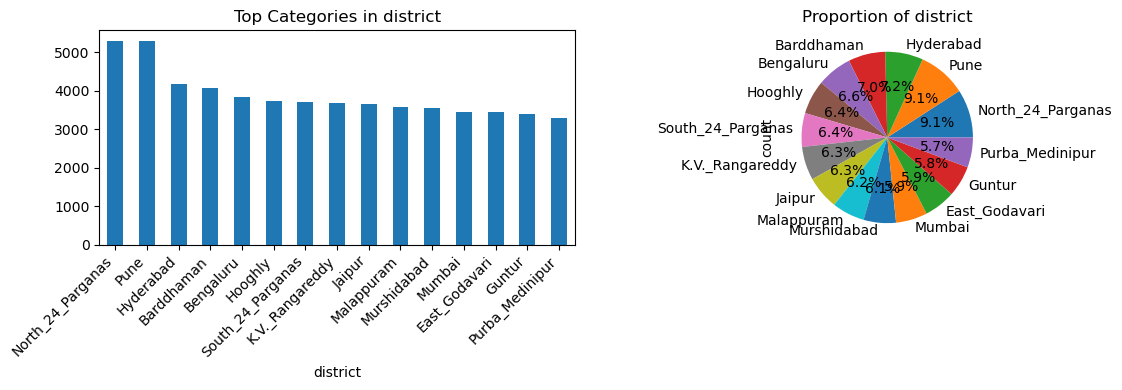


Key Insights:
- Total unique values: 887
- Most common: North_24_Parganas (5308 occurrences)
- Top 5:
district
North_24_Parganas    5308
Pune                 5288
Hyderabad            4168
Barddhaman           4067
Bengaluru            3839
Name: count, dtype: int64

Analyzing: pincode

Basic Statistics:
count    762084.000000
mean     516827.035118
std      207603.658704
min      110001.000000
25%      360575.000000
50%      515671.000000
75%      700145.000000
max      855117.000000
Name: pincode, dtype: float64


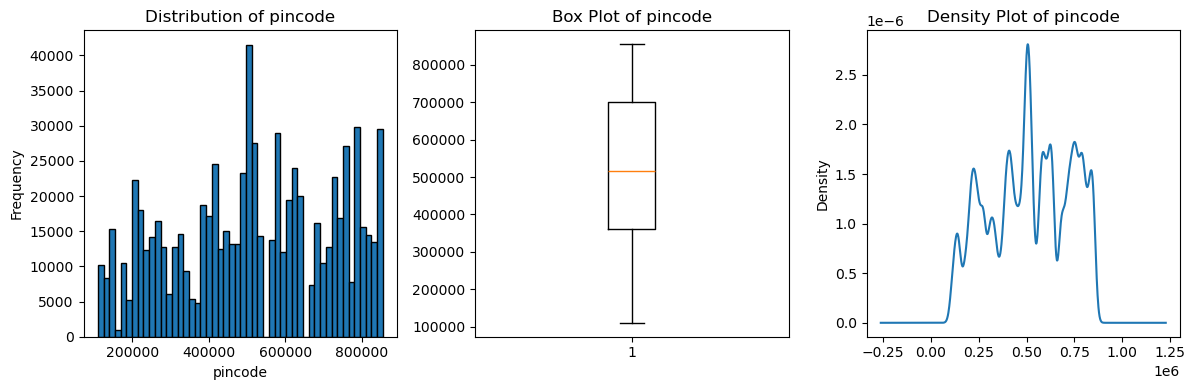


Key Insights:
- Mean: 516827.04
- Median: 515671.00
- Std Dev: 207603.66
- Range: 110001.00 to 855117.00


In [11]:
def analyze_variable(df, column_name):

    print(f"\n{'='*60}")
    print(f"Analyzing: {column_name}")
    print(f"{'='*60}")
    
    print(f"\nBasic Statistics:")
    print(df[column_name].describe())
    
    plt.figure(figsize=(12, 4))
    
    if df[column_name].dtype in ['int64', 'float64']:
        plt.subplot(1, 3, 1)
        plt.hist(df[column_name].dropna(), bins=50, edgecolor='black')
        plt.title(f'Distribution of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        
        plt.subplot(1, 3, 2)
        plt.boxplot(df[column_name].dropna())
        plt.title(f'Box Plot of {column_name}')
        
        plt.subplot(1, 3, 3)
        df[column_name].plot(kind='kde')
        plt.title(f'Density Plot of {column_name}')
        
    else:
        plt.subplot(1, 2, 1)
        value_counts = df[column_name].value_counts().head(15)
        value_counts.plot(kind='bar')
        plt.title(f'Top Categories in {column_name}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 2, 2)
        value_counts.plot(kind='pie', autopct='%1.1f%%')
        plt.title(f'Proportion of {column_name}')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nKey Insights:")
    if df[column_name].dtype in ['int64', 'float64']:
        print(f"- Mean: {df[column_name].mean():.2f}")
        print(f"- Median: {df[column_name].median():.2f}")
        print(f"- Std Dev: {df[column_name].std():.2f}")
        print(f"- Range: {df[column_name].min():.2f} to {df[column_name].max():.2f}")
    else:
        print(f"- Total unique values: {df[column_name].nunique()}")
        print(f"- Most common: {df[column_name].mode()[0]} ({df[column_name].value_counts().iloc[0]} occurrences)")
        print(f"- Top 5:\n{df[column_name].value_counts().head()}")

analyze_variable(df_main, 'state')
analyze_variable(df_main, 'district')
analyze_variable(df_main, 'pincode')